# **Sales Analysis and Forecasting**

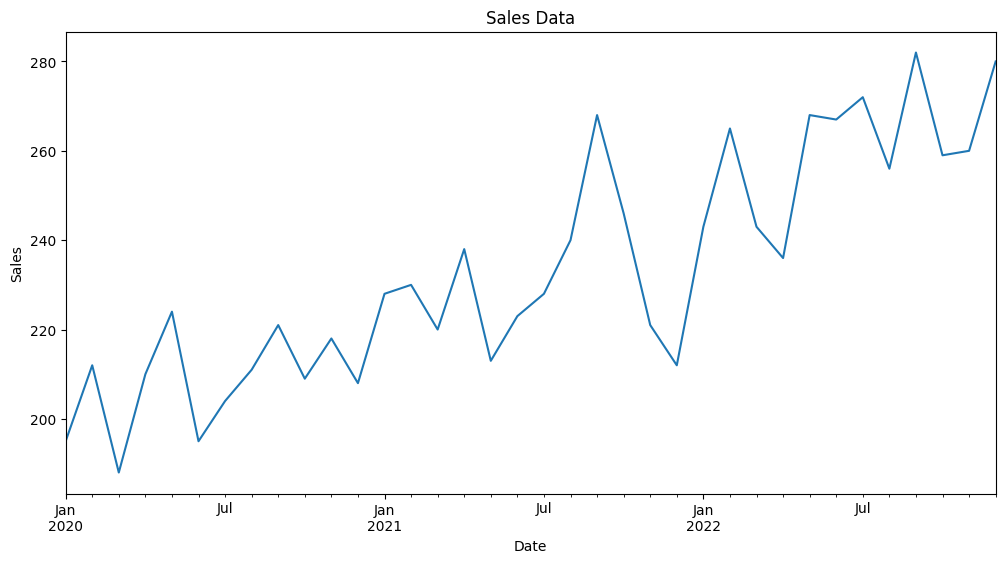

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


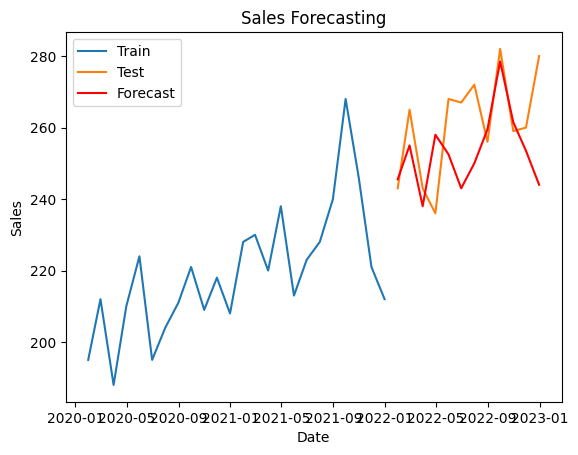

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales = np.random.poisson(lam=200, size=36) + np.arange(36) * 2

data = pd.DataFrame({'Date': date_range, 'Sales': sales})
data.set_index('Date', inplace=True)

data['Sales'].plot(title='Sales Data', ylabel='Sales', xlabel='Date', figsize=(12, 6))
plt.show()

train_data = data['Sales'][:-12]
test_data = data['Sales'][-12:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

forecast = model_fit.forecast(12)

plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecasting')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()